In [1871]:
import pandas as pd #pandas library
import re as re 
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt #Plotting library
import datetime as dt #datetime for timeseries support

<h1> Take a look at the data <h1>

In [1872]:
data = pd.read_csv('matala2_cosmetics_2019-Nov.csv')


<ipython-input-1872-e6a660652f87>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('matala2_cosmetics_2019-Nov.csv')


In [1873]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [1874]:
data.shape

(4635837, 9)

In [1875]:
data.info()#need to fix event_time,price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   event_time     object
 1   event_type     object
 2   product_id     int64 
 3   category_id    int64 
 4   category_code  object
 5   brand          object
 6   price          object
 7   user_id        int64 
 8   user_session   object
dtypes: int64(3), object(6)
memory usage: 318.3+ MB


In [1876]:
data['event_time'] = data['event_time'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S UTC'))


In [1877]:
data.user_id.value_counts()

527021202    11720
550388516     4181
500179293     3665
552908674     3375
467810091     2946
             ...  
571545314        1
571545695        1
571545691        1
571545800        1
579969854        1
Name: user_id, Length: 368232, dtype: int64

In [1878]:
train_data=data.iloc[0:10,:]#because the data is big I will do founctains on the train_data

In [1879]:
train_data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
5,2019-11-01 00:00:24,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
6,2019-11-01 00:00:25,view,5856189,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
7,2019-11-01 00:00:32,view,5837835,1933472286753424063,NaN,NaN,3.49,514649199,432a4e95-375c-4b40-bd36-0fc039e77580
8,2019-11-01 00:00:34,remove_from_cart,5870838,1487580007675986893,NaN,milv,0.79,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a
9,2019-11-01 00:00:37,view,5870803,1487580007675986893,NaN,milv,0.79,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a


<h1> Q1 

In [1880]:
a=train_data.sort_values(['user_session','user_id']).groupby('user_session')[['event_time']].diff(-1)
a=np.absolute(a.event_time.dt.total_seconds().fillna(0))
train_data['duration_to_next_event'] = a

<ipython-input-1880-c777b97aa6de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['duration_to_next_event'] = a


In [1881]:
a

0    23.0
6     0.0
3     0.0
1    15.0
4     0.0
5     0.0
8     3.0
9     0.0
7     0.0
2     0.0
Name: event_time, dtype: float64

In [1882]:
data['duration_to_next_event']=data.sort_values(['user_id','user_session']).groupby('user_session')[['event_time']].diff(-1)
data['duration_to_next_event']=np.absolute(data.duration_to_next_event.dt.total_seconds().fillna(0))

In [1883]:
data.iloc[np.where(data['user_session'] == '09fafd6c-6c99-46b1-834f-33527f4de241')]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
0,2019-11-01 00:00:02,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,23.0
6,2019-11-01 00:00:25,view,5856189,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,25.0
12,2019-11-01 00:00:50,view,5856190,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,7.0
15,2019-11-01 00:00:57,view,5674484,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,167.0
53,2019-11-01 00:03:44,cart,5674484,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,2.0
55,2019-11-01 00:03:46,view,5856190,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,8.0
56,2019-11-01 00:03:54,view,5856189,1487580009026551821,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,68.0
80,2019-11-01 00:05:02,view,5896424,1487580006300255120,NaN,jessnail,32.54,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,0.0


In [1884]:
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
0,2019-11-01 00:00:02,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,23.0
1,2019-11-01 00:00:09,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,15.0
2,2019-11-01 00:00:10,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,45.0
3,2019-11-01 00:00:11,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,103.0
4,2019-11-01 00:00:24,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0.0
...,...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,0.0
4635833,2019-11-30 23:59:47,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95,0.0
4635834,2019-11-30 23:59:47,view,5867785,1487580007835370453,NaN,kims,31.1,572579084,d42865b7-7e04-4038-9be0-a59165625f06,0.0
4635835,2019-11-30 23:59:57,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063,0.0


In [1885]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 10 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   event_time              datetime64[ns]
 1   event_type              object        
 2   product_id              int64         
 3   category_id             int64         
 4   category_code           object        
 5   brand                   object        
 6   price                   object        
 7   user_id                 int64         
 8   user_session            object        
 9   duration_to_next_event  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 353.7+ MB


<h1> Q2

In [1886]:
#86400 sec in 1 day
train_data=data.iloc[np.where((data['user_id'] == 476617079) | (data['user_id'] == 457678989))].sort_values(['user_id','event_time'])
train_data


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
2636608,2019-11-20 11:26:05,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,41.0
2636707,2019-11-20 11:26:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,116.0
2636997,2019-11-20 11:28:42,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,0.0
4635787,2019-11-30 23:58:15,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,ee50b160-a4db-4722-8751-6812c5b38295,91.0
4635832,2019-11-30 23:59:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,0.0
141569,2019-11-02 08:39:14,cart,5587660,1487580008145748965,NaN,roubloff,4.75,476617079,e6c265d5-f607-4221-a591-8d03c96878db,10.0
141580,2019-11-02 08:39:24,cart,5697534,1487580008145748965,NaN,roubloff,4.21,476617079,e6c265d5-f607-4221-a591-8d03c96878db,99.0
141722,2019-11-02 08:41:03,cart,5587656,1487580008145748965,NaN,roubloff,3.65,476617079,e6c265d5-f607-4221-a591-8d03c96878db,74.0
141830,2019-11-02 08:42:17,cart,5587544,1487580008145748965,NaN,roubloff,2.68,476617079,e6c265d5-f607-4221-a591-8d03c96878db,58.0
141919,2019-11-02 08:43:15,cart,5838759,1487580006979732399,NaN,bluesky,3.97,476617079,e6c265d5-f607-4221-a591-8d03c96878db,13.0


In [1898]:
funnel_lst=np.array([1])
def funnel(data):
    if (data['id_diff'] != 0):
        funnel_lst[0] = 1
    elif((data['day_diff'] > 5) and (data['id_diff'] == 0)):
        funnel_lst[0] += 1
    return funnel_lst[0]

In [1899]:
train_data['day_diff']=abs(train_data[['event_time']].diff(1).event_time.dt.days.fillna(0))
train_data['id_diff']=train_data[['user_id']].diff(1).fillna(-1)#if diff= 0 same id 
train_data['funnel'] = train_data.apply(funnel,axis=1) 
train_data=train_data.drop(columns=['id_diff', 'day_diff'])

In [1900]:
train_data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel
2636608,2019-11-20 11:26:05,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,41.0,1
2636707,2019-11-20 11:26:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,116.0,1
2636997,2019-11-20 11:28:42,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,0.0,1
4635787,2019-11-30 23:58:15,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,ee50b160-a4db-4722-8751-6812c5b38295,91.0,2
4635832,2019-11-30 23:59:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,0.0,2
141569,2019-11-02 08:39:14,cart,5587660,1487580008145748965,NaN,roubloff,4.75,476617079,e6c265d5-f607-4221-a591-8d03c96878db,10.0,1
141580,2019-11-02 08:39:24,cart,5697534,1487580008145748965,NaN,roubloff,4.21,476617079,e6c265d5-f607-4221-a591-8d03c96878db,99.0,1
141722,2019-11-02 08:41:03,cart,5587656,1487580008145748965,NaN,roubloff,3.65,476617079,e6c265d5-f607-4221-a591-8d03c96878db,74.0,1
141830,2019-11-02 08:42:17,cart,5587544,1487580008145748965,NaN,roubloff,2.68,476617079,e6c265d5-f607-4221-a591-8d03c96878db,58.0,1
141919,2019-11-02 08:43:15,cart,5838759,1487580006979732399,NaN,bluesky,3.97,476617079,e6c265d5-f607-4221-a591-8d03c96878db,13.0,1


In [1901]:
data=data.sort_values(['user_id','event_time'])
data['day_diff']=abs(data[['event_time']].diff(1).event_time.dt.days.fillna(0))
data['id_diff']=data[['user_id']].diff(1).fillna(-1)#if diff= 0 same id 
data['funnel'] = data.apply(funnel,axis=1) 
data=data.drop(columns=['id_diff', 'day_diff'])

In [1902]:
data.iloc[np.where((data['user_id'] == 476617079) | (data['user_id'] == 457678989))].sort_values(['user_id','event_time'])

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel
2636608,2019-11-20 11:26:05,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,41.0,1
2636707,2019-11-20 11:26:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,116.0,1
2636997,2019-11-20 11:28:42,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,0.0,1
4635787,2019-11-30 23:58:15,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,ee50b160-a4db-4722-8751-6812c5b38295,91.0,2
4635832,2019-11-30 23:59:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,0.0,2
141569,2019-11-02 08:39:14,cart,5587660,1487580008145748965,NaN,roubloff,4.75,476617079,e6c265d5-f607-4221-a591-8d03c96878db,10.0,1
141580,2019-11-02 08:39:24,cart,5697534,1487580008145748965,NaN,roubloff,4.21,476617079,e6c265d5-f607-4221-a591-8d03c96878db,99.0,1
141722,2019-11-02 08:41:03,cart,5587656,1487580008145748965,NaN,roubloff,3.65,476617079,e6c265d5-f607-4221-a591-8d03c96878db,74.0,1
141830,2019-11-02 08:42:17,cart,5587544,1487580008145748965,NaN,roubloff,2.68,476617079,e6c265d5-f607-4221-a591-8d03c96878db,58.0,1
141919,2019-11-02 08:43:15,cart,5838759,1487580006979732399,NaN,bluesky,3.97,476617079,e6c265d5-f607-4221-a591-8d03c96878db,13.0,1


<h1> Q3

In [2017]:
def index_funnel(data):
    return data['index_in_funnel']/ data['funnel']

In [2018]:
train_data['index_in_funnel']= train_data.groupby(['user_id','funnel'])[['funnel']].cumsum(axis=0)
train_data['index_in_funnel']= train_data.apply(index_funnel,axis=1)
train_data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel,index_in_funnel,funnel_num_index,check
2636608,2019-11-20 11:26:05,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,41.0,1,1.0,1,1.0
2636707,2019-11-20 11:26:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,116.0,1,2.0,2,2.0
2636997,2019-11-20 11:28:42,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,0.0,1,3.0,3,3.0
4635787,2019-11-30 23:58:15,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,ee50b160-a4db-4722-8751-6812c5b38295,91.0,2,1.0,2,1.0
4635832,2019-11-30 23:59:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,0.0,2,2.0,4,2.0
141569,2019-11-02 08:39:14,cart,5587660,1487580008145748965,NaN,roubloff,4.75,476617079,e6c265d5-f607-4221-a591-8d03c96878db,10.0,1,1.0,1,1.0
141580,2019-11-02 08:39:24,cart,5697534,1487580008145748965,NaN,roubloff,4.21,476617079,e6c265d5-f607-4221-a591-8d03c96878db,99.0,1,2.0,2,2.0
141722,2019-11-02 08:41:03,cart,5587656,1487580008145748965,NaN,roubloff,3.65,476617079,e6c265d5-f607-4221-a591-8d03c96878db,74.0,1,3.0,3,3.0
141830,2019-11-02 08:42:17,cart,5587544,1487580008145748965,NaN,roubloff,2.68,476617079,e6c265d5-f607-4221-a591-8d03c96878db,58.0,1,4.0,4,4.0
141919,2019-11-02 08:43:15,cart,5838759,1487580006979732399,NaN,bluesky,3.97,476617079,e6c265d5-f607-4221-a591-8d03c96878db,13.0,1,5.0,5,5.0


In [2020]:
data=data.sort_values(['user_id','event_time'])
data['index_in_funnel']= data.groupby(['user_id','funnel'])[['funnel']].cumsum(axis=0)
data['index_in_funnel'] = data.apply(index_funnel,axis=1)
data['index_in_funnel'] = data['index_in_funnel'].astype(int)

In [2021]:
data.iloc[np.where((data['user_id'] == 476617079) | (data['user_id'] == 457678989))].sort_values(['user_id','event_time'])

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel,index_in_funnel
2636608,2019-11-20 11:26:05,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,41.0,1,1
2636707,2019-11-20 11:26:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,116.0,1,2
2636997,2019-11-20 11:28:42,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,0.0,1,3
4635787,2019-11-30 23:58:15,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,ee50b160-a4db-4722-8751-6812c5b38295,91.0,2,1
4635832,2019-11-30 23:59:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,0.0,2,2
141569,2019-11-02 08:39:14,cart,5587660,1487580008145748965,NaN,roubloff,4.75,476617079,e6c265d5-f607-4221-a591-8d03c96878db,10.0,1,1
141580,2019-11-02 08:39:24,cart,5697534,1487580008145748965,NaN,roubloff,4.21,476617079,e6c265d5-f607-4221-a591-8d03c96878db,99.0,1,2
141722,2019-11-02 08:41:03,cart,5587656,1487580008145748965,NaN,roubloff,3.65,476617079,e6c265d5-f607-4221-a591-8d03c96878db,74.0,1,3
141830,2019-11-02 08:42:17,cart,5587544,1487580008145748965,NaN,roubloff,2.68,476617079,e6c265d5-f607-4221-a591-8d03c96878db,58.0,1,4
141919,2019-11-02 08:43:15,cart,5838759,1487580006979732399,NaN,bluesky,3.97,476617079,e6c265d5-f607-4221-a591-8d03c96878db,13.0,1,5


<h5> another way (more similar to Q2)

<h1> Q4

In [2030]:
def fix_price(price):
    try:
        price=float(price)
    except:
        price=price.replace('[^0-9.]', '', regex=True).astype(float)    
    return price


In [2031]:
data['price'] = fix_price(data['price'])
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel,index_in_funnel
437209,2019-11-04 15:28:57,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1
2483241,2019-11-19 09:56:09,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,1,1
2494623,2019-11-19 11:14:48,view,5814066,1487580005855658874,NaN,grattol,2.30,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1,2
2640971,2019-11-20 11:58:06,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1,3
2641003,2019-11-20 11:58:27,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4635733,2019-11-30 23:56:14,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,3.0,1,3
4635736,2019-11-30 23:56:17,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,4.0,1,4
4635737,2019-11-30 23:56:21,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0,1,5
4635752,2019-11-30 23:56:46,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0.0,1,1


<h1> Q5

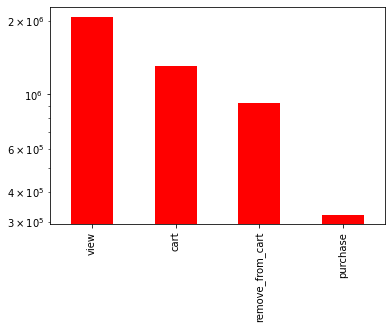

In [2033]:
data.event_type.value_counts().plot(kind='bar',color='red')
plt.yscale('log')


<h1> Q6

<h3>a.b.c.d

In [2216]:
session_data= data.loc[:,('user_id','user_session','funnel','index_in_funnel')]
session_data

,user_id,user_session,funnel,index_in_funnel
437209,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1
2483241,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,1
2494623,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,2
2640971,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,3
2641003,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,4
...,...,...,...,...
4635733,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,3
4635736,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,4
4635737,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,5
4635752,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,1


<h3>e

In [2223]:
session_data['e']=session_data.groupby('user_session')[['user_id']].transform('count')
session_data=session_data.drop_duplicates(subset=["user_session"])
session_data

,user_id,user_session,funnel,index_in_funnel,e,duration_in_sec
437209,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1,1.0,0.0
2483241,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,1,1.0,0.0
2494623,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,2,1.0,0.0
2640971,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,3,28.0,3789.0
2741454,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,31,1.0,0.0
...,...,...,...,...,...,...
4635578,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,1,1,1.0,0.0
4635655,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,1,1,1.0,0.0
4635713,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,1,5.0,38.0
4635752,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,1,1.0,0.0


<h3> f

In [2224]:
session_data['duration_in_sec']=data.sort_values(['user_session','user_id','event_time']).groupby('user_session')[['duration_to_next_event']].transform('sum')

<ipython-input-2224-979d4d326187>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['duration_in_sec']=data.sort_values(['user_session','user_id','event_time']).groupby('user_session')[['duration_to_next_event']].transform('sum')


In [2225]:
session_data=session_data.drop_duplicates(subset=["user_session"])
session_data

,user_id,user_session,funnel,index_in_funnel,e,duration_in_sec
437209,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1,1.0,0.0
2483241,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,1,1.0,0.0
2494623,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,2,1.0,0.0
2640971,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,3,28.0,3789.0
2741454,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,31,1.0,0.0
...,...,...,...,...,...,...
4635578,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,1,1,1.0,0.0
4635655,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,1,1,1.0,0.0
4635713,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,1,5.0,38.0
4635752,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,1,1.0,0.0


<h3> g

In [2226]:
list_viewed_data = data.iloc[np.where(data['event_type']=='view')].groupby(['user_session']).agg(
{
    'product_id': lambda x: list(x),
    
}).reset_index()
list_viewed_data.rename(columns={"product_id": "list_of_viewed"})
session_data= session_data.merge(list_viewed_data,how='left', on='user_session').fillna("[ ]")

In [2227]:
session_data

,user_id,user_session,funnel,index_in_funnel,e,duration_in_sec,product_id
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1,1.0,0.0,[5240]
1,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,1,1.0,0.0,[5711145]
2,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,2,1.0,0.0,[5814066]
3,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,3,28.0,3789.0,"[5800358, 5800349, 5800349, 5800358, 5712576, ..."
4,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,31,1.0,0.0,[5711087]
...,...,...,...,...,...,...,...
942018,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,1,1,1.0,0.0,[5881428]
942019,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,1,1,1.0,0.0,[5873630]
942020,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,1,5.0,38.0,"[5892179, 5886282, 5892179, 5900651, 5892179]"
942021,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,1,1.0,0.0,[5790563]


<h3> h

In [2228]:
list_cart_data = data.iloc[np.where(data['event_type'] == 'cart')].groupby(['user_session']).agg(
{
    'product_id': lambda x: list(x),
    
}).reset_index()
list_cart_data=list_cart_data.rename(columns={"product_id": "list_of_added_cart"})
session_data= session_data.merge(list_cart_data,how='left', on='user_session').fillna("[ ]")

In [2229]:
session_data

,user_id,user_session,funnel,index_in_funnel,e,duration_in_sec,product_id,list_of_added_cart
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1,1.0,0.0,[5240],[ ]
1,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,1,1.0,0.0,[5711145],[ ]
2,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,2,1.0,0.0,[5814066],[ ]
3,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,3,28.0,3789.0,"[5800358, 5800349, 5800349, 5800358, 5712576, ...",[ ]
4,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,31,1.0,0.0,[5711087],[ ]
...,...,...,...,...,...,...,...,...
942018,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,1,1,1.0,0.0,[5881428],[ ]
942019,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,1,1,1.0,0.0,[5873630],[ ]
942020,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,1,5.0,38.0,"[5892179, 5886282, 5892179, 5900651, 5892179]",[ ]
942021,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,1,1.0,0.0,[5790563],[ ]


In [2230]:
session_data.iloc[np.where(session_data['user_session'] == '0000d72e-be5f-4a03-9f17-6ac81584f177')]

,user_id,user_session,funnel,index_in_funnel,e,duration_in_sec,product_id,list_of_added_cart
161210,463202709,0000d72e-be5f-4a03-9f17-6ac81584f177,1,23,12.0,2432.0,"[59996, 5739492, 5739493, 5739493, 5739493, 57...","[5739493, 5569528, 5813882]"


<h3> i

In [2231]:
list_purchase_data = data.iloc[np.where(data['event_type'] == 'purchase')].groupby(['user_session']).agg(
{
    'product_id': lambda x: list(x),
    
}).reset_index()
list_purchase_data=list_purchase_data.rename(columns={"product_id": "list_of_purchase"})
session_data= session_data.merge(list_purchase_data,how='left', on='user_session').fillna("[ ]")

In [2232]:
session_data

,user_id,user_session,funnel,index_in_funnel,e,duration_in_sec,product_id,list_of_added_cart,list_of_purchase
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1,1.0,0.0,[5240],[ ],[ ]
1,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,1,1.0,0.0,[5711145],[ ],[ ]
2,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,2,1.0,0.0,[5814066],[ ],[ ]
3,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,3,28.0,3789.0,"[5800358, 5800349, 5800349, 5800358, 5712576, ...",[ ],[ ]
4,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,31,1.0,0.0,[5711087],[ ],[ ]
...,...,...,...,...,...,...,...,...,...
942018,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,1,1,1.0,0.0,[5881428],[ ],[ ]
942019,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,1,1,1.0,0.0,[5873630],[ ],[ ]
942020,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,1,5.0,38.0,"[5892179, 5886282, 5892179, 5900651, 5892179]",[ ],[ ]
942021,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,1,1.0,0.0,[5790563],[ ],[ ]


In [2233]:
session_data.iloc[np.where(session_data['user_session'] == '0002ad82-84d0-40be-8d1a-b48de3ef8fe3')]

,user_id,user_session,funnel,index_in_funnel,e,duration_in_sec,product_id,list_of_added_cart,list_of_purchase
412809,549507462,0002ad82-84d0-40be-8d1a-b48de3ef8fe3,1,17,561.0,7171.0,[5875286],"[5843642, 5815833, 5843634, 5843638, 5843637, ...","[5844306, 5841721, 5844303, 5843837, 5843642, ..."
